In [1]:
import pandas as pd

from mitotic_classifer import *

# Running SVM model with file:
# 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
# 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs
# 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs


In [2]:
df_ori_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')

df_ori_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_final_data.csv')
df_cellcyle_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_singlecell_cellcycle.csv')
df_ori_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_final_data.csv')
df_cellcyle_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_singlecell_cellcycle.csv')


# 1. 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#

In [3]:
# print(df_cellcyle_230109.groupby('cell_cycle').count())
df_all=merge_data(df1=df_ori_230109,df2=df_cellcyle_230109,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2/M,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872,...,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
S,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766,...,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [4]:
data=pd.concat([df_all[df_all['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,NT,99.0,212.0,2.317516e+06,2.317516e+06,16440.745206,2892.215170,16440.745206,10931.679286,...,12818.199652,19969.682206,1,1466,3.881975,0.999464,1.063247,1.399058,G2,G2/M
1,RPE-1,1NM_24h,115.0,191.0,2.177133e+06,2.177133e+06,15650.483387,3241.096676,15650.483387,11398.603846,...,6965.747420,15266.362032,1,1058,3.646826,1.003346,0.767336,1.260472,G2,G2/M
2,RPE-1,1NM_12h,40.0,156.0,2.431757e+06,2.431757e+06,24583.033027,6189.693225,24583.033027,15588.186844,...,11627.850155,41121.183975,1,448,4.073336,1.000231,0.324921,1.029496,G2,G2/M
3,RPE-1,1NM_TAK_24h,57.0,124.0,2.498898e+06,2.498898e+06,33249.250750,5658.428102,33249.250750,20152.404012,...,9381.600271,18565.490533,1,618,4.185801,1.168616,0.448217,0.818317,G2,G2/M
4,RPE-1,TAK931_24h,15.0,297.0,2.407447e+06,2.407447e+06,11677.480149,1990.719438,11677.480149,8105.883367,...,8262.032921,13546.145054,1,2160,4.032615,1.004178,1.566584,1.960002,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_TAK_24h,35.0,196.0,2.288703e+06,2.288703e+06,19292.338957,4424.229087,19292.338957,11677.058509,...,6796.151854,13991.043547,1,651,3.833712,1.049619,0.472151,1.293469,G2,G2/M
16868,RPE-1,1NM_24h,47.0,247.0,2.368183e+06,2.368183e+06,14897.773439,2221.549575,14897.773439,9587.785260,...,8545.244334,17925.512657,1,1847,3.966845,1.037166,1.339575,1.630035,G2,G2/M
16869,RPE-1,TAK931_12h,239.0,286.0,2.913829e+06,2.913829e+06,17394.139525,2630.696004,17394.139525,10188.213723,...,7663.103492,14265.038150,1,1927,4.880834,0.999569,1.397596,1.887409,G2,G2/M
16870,RPE-1,Palb_24h,41.0,237.0,2.378816e+06,2.378816e+06,16652.480023,2160.681566,16652.480023,10037.198321,...,8814.387340,14603.642868,1,1940,3.984656,0.989305,1.407025,1.564042,G2,G2/M


# pre-trained SVM
# without Edu

accuracy 0.8475580844001896


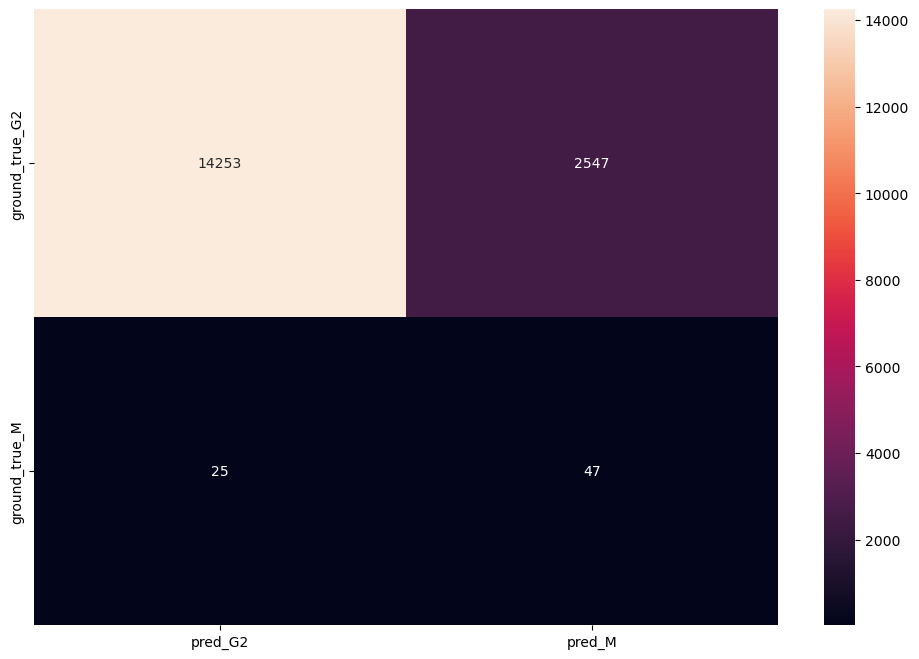

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,NT,99.0,212.0,2.317516e+06,2.317516e+06,16440.745206,2892.215170,16440.745206,10931.679286,...,19969.682206,1,1466,3.881975,0.999464,1.063247,1.399058,G2,G2/M,G2
1,RPE-1,1NM_24h,115.0,191.0,2.177133e+06,2.177133e+06,15650.483387,3241.096676,15650.483387,11398.603846,...,15266.362032,1,1058,3.646826,1.003346,0.767336,1.260472,G2,G2/M,M
2,RPE-1,1NM_12h,40.0,156.0,2.431757e+06,2.431757e+06,24583.033027,6189.693225,24583.033027,15588.186844,...,41121.183975,1,448,4.073336,1.000231,0.324921,1.029496,G2,G2/M,M
3,RPE-1,1NM_TAK_24h,57.0,124.0,2.498898e+06,2.498898e+06,33249.250750,5658.428102,33249.250750,20152.404012,...,18565.490533,1,618,4.185801,1.168616,0.448217,0.818317,G2,G2/M,M
4,RPE-1,TAK931_24h,15.0,297.0,2.407447e+06,2.407447e+06,11677.480149,1990.719438,11677.480149,8105.883367,...,13546.145054,1,2160,4.032615,1.004178,1.566584,1.960002,G2,G2/M,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,1NM_TAK_24h,35.0,196.0,2.288703e+06,2.288703e+06,19292.338957,4424.229087,19292.338957,11677.058509,...,13991.043547,1,651,3.833712,1.049619,0.472151,1.293469,G2,G2/M,M
16868,RPE-1,1NM_24h,47.0,247.0,2.368183e+06,2.368183e+06,14897.773439,2221.549575,14897.773439,9587.785260,...,17925.512657,1,1847,3.966845,1.037166,1.339575,1.630035,G2,G2/M,G2
16869,RPE-1,TAK931_12h,239.0,286.0,2.913829e+06,2.913829e+06,17394.139525,2630.696004,17394.139525,10188.213723,...,14265.038150,1,1927,4.880834,0.999569,1.397596,1.887409,G2,G2/M,G2
16870,RPE-1,Palb_24h,41.0,237.0,2.378816e+06,2.378816e+06,16652.480023,2160.681566,16652.480023,10037.198321,...,14603.642868,1,1940,3.984656,0.989305,1.407025,1.564042,G2,G2/M,G2


In [5]:
data_without_edu=check_pretrained_model(data=data,pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_without_edu

# include EdU

accuracy 0.1770981507823613


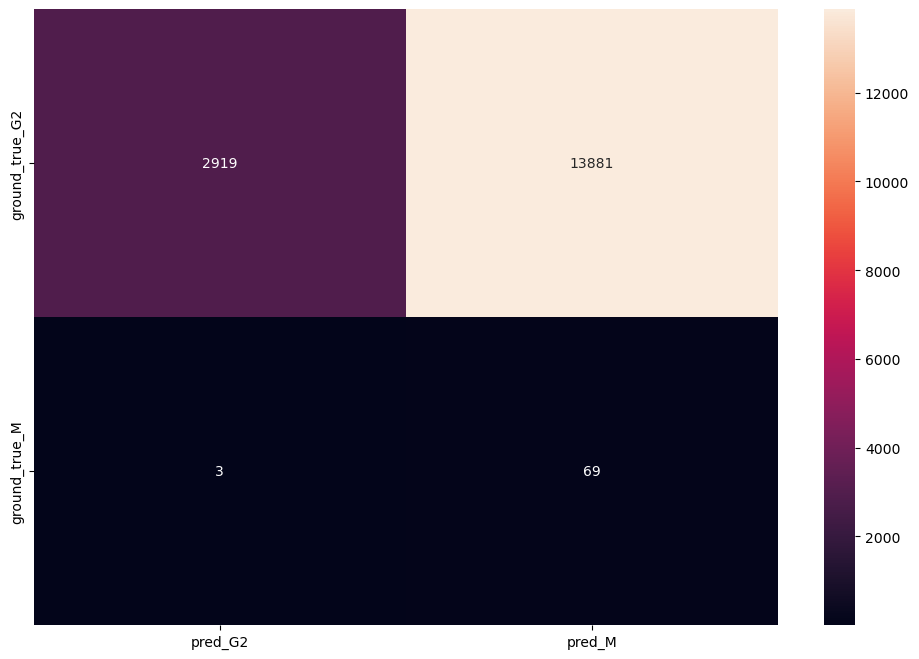

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,1NM_24h,79.0,120.0,2.292627e+06,2.292627e+06,33519.243259,3945.473310,33519.243259,19105.228477,...,19061.397172,1,871,3.840285,1.248905,0.631711,0.791920,G2,G2/M,M
1,RPE-1,1NM_12h,103.0,221.0,2.709197e+06,2.709197e+06,17903.652279,3857.542415,17903.652279,12258.810580,...,13773.992458,1,1091,4.538064,1.002482,0.791270,1.458452,G2,G2/M,M
2,RPE-1,Palb_12h,103.0,273.0,2.354051e+06,2.354051e+06,14582.880633,3595.465673,14582.880633,8622.895933,...,17703.001045,1,818,3.943173,1.068775,0.593271,1.801618,G2,G2/M,M
3,RPE-1,Palb_24h,76.0,311.0,2.531573e+06,2.531573e+06,11236.875475,1562.315637,11236.875475,8140.106560,...,22602.200992,1,3741,4.240533,0.995020,2.713237,2.052392,G2,G2/M,G2
4,RPE-1,Palb_12h,124.0,260.0,2.970025e+06,2.970025e+06,19844.412510,2447.857432,19844.412510,11423.172284,...,17121.216766,1,2052,4.974965,1.064030,1.488255,1.715826,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,TAK931_12h,143.0,336.0,2.497285e+06,2.497285e+06,12205.420868,1796.822946,12205.420868,7432.395261,...,11625.478854,1,2809,4.183098,0.981406,2.037285,2.217376,G2,G2/M,M
16868,RPE-1,Palb_12h,268.0,197.0,2.512499e+06,2.512499e+06,20191.757020,3613.201450,20191.757020,12753.800813,...,15250.988121,1,1068,4.208583,1.048120,0.774589,1.300068,G2,G2/M,M
16869,RPE-1,TAK931_12h,142.0,257.0,2.502550e+06,2.502550e+06,14718.120657,2866.296641,14718.120657,9737.547878,...,15677.476266,1,1738,4.191917,1.015090,1.260520,1.696028,G2,G2/M,M
16870,RPE-1,1NM_TAK_12h,76.0,153.0,2.224631e+06,2.224631e+06,25642.906339,3607.752108,25642.906339,14540.069594,...,25470.241620,1,890,3.726387,1.186266,0.645491,1.009698,G2,G2/M,M


In [6]:
data_with_edu=check_pretrained_model(data,pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_with_edu

# 2. 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs

In [6]:
df_cellcyle_221108_P1.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382,...,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382
G1,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556,...,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556
G2,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339,...,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339
Late S,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378,...,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378
M,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,...,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775
Polyploid,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102,...,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102
Polyploid (replicating),6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,...,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327
Sub-G1,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074,...,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074


In [7]:
df_all_p1=merge_data(df1=df_ori_221108_P1,df2=df_cellcyle_221108_P1,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p1.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461,...,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461
G1,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958,...,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958
G2,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930,...,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930
Late S,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,...,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148
M,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,...,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437
Polyploid,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
Polyploid (replicating),3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,...,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485
Sub-G1,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989


In [9]:
data_p1=pd.concat([df_all_p1[df_all_p1['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p1

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,U2OS,CDK4,535.0,119.0,2.322034e+06,2.322034e+06,35948.605301,8151.548400,35948.605301,19512.889219,...,10303.267651,43584.974016,1,378,3.646687,1.116789,0.435003,0.708838,M,G2/M
1,MM231,FNTA,219.0,99.0,1.914180e+06,1.914180e+06,29500.496311,5722.189405,29500.496311,19335.151146,...,10946.026784,26753.804802,1,449,3.647647,0.973350,0.874473,0.903931,G2,G2/M
2,U2OS,NT,491.0,219.0,2.287696e+06,2.287696e+06,14709.449855,3465.544610,14709.449855,10446.100648,...,6443.644592,10154.600783,1,932,3.592761,0.976209,1.072546,1.304500,G2,G2/M
3,MM231,C14orf80,398.0,137.0,2.046088e+06,2.046088e+06,24735.740832,4963.006069,24735.740832,14934.946703,...,13633.613640,18884.556432,1,588,3.899009,0.989650,1.145189,1.250894,G2,G2/M
4,U2OS,SCR,510.0,216.0,2.264708e+06,2.264708e+06,13668.623282,4178.027897,13668.623282,10484.757275,...,6131.453400,9196.818660,1,719,3.556658,0.953988,0.827425,1.286630,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,U2OS,SCR,1398.0,194.0,2.541176e+06,2.541176e+06,16916.463817,10082.301952,16916.463817,13098.846126,...,5791.136364,8377.399818,1,285,3.990844,1.188090,0.327978,1.155585,G2,G2/M
63363,U2OS,INHBE,702.0,195.0,2.209798e+06,2.209798e+06,16514.516301,2611.196675,16514.516301,11332.298318,...,5945.653971,8552.040202,1,1334,3.470425,1.015417,1.535168,1.161541,G2,G2/M
63364,RPE-1,NT,664.0,297.0,1.798500e+06,1.798500e+06,8209.269024,2034.464575,8209.269024,6055.554419,...,5544.234423,7843.940763,1,1738,3.907872,0.981272,1.508515,1.818681,G2,G2/M
63365,RPE-1,SCR,143.0,209.0,1.795468e+06,1.795468e+06,13639.015056,2635.144066,13639.015056,8590.757185,...,6303.849426,10615.385247,1,1124,3.901285,0.992452,0.975588,1.279812,G2,G2/M


without Edu

accuracy 0.963308977859138


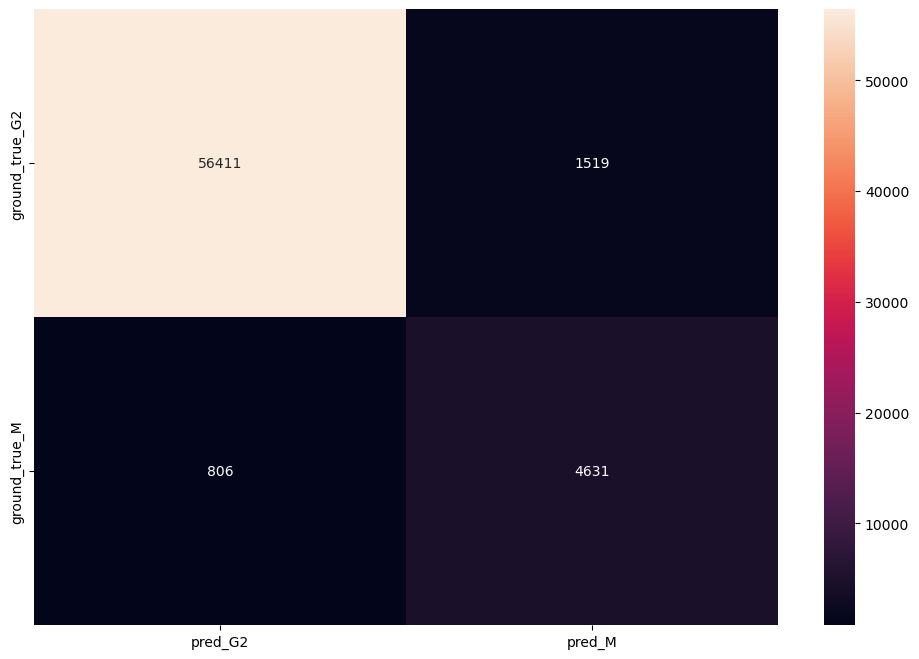

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,CDK4,535.0,119.0,2.322034e+06,2.322034e+06,35948.605301,8151.548400,35948.605301,19512.889219,...,43584.974016,1,378,3.646687,1.116789,0.435003,0.708838,M,G2/M,M
1,MM231,FNTA,219.0,99.0,1.914180e+06,1.914180e+06,29500.496311,5722.189405,29500.496311,19335.151146,...,26753.804802,1,449,3.647647,0.973350,0.874473,0.903931,G2,G2/M,M
2,U2OS,NT,491.0,219.0,2.287696e+06,2.287696e+06,14709.449855,3465.544610,14709.449855,10446.100648,...,10154.600783,1,932,3.592761,0.976209,1.072546,1.304500,G2,G2/M,G2
3,MM231,C14orf80,398.0,137.0,2.046088e+06,2.046088e+06,24735.740832,4963.006069,24735.740832,14934.946703,...,18884.556432,1,588,3.899009,0.989650,1.145189,1.250894,G2,G2/M,G2
4,U2OS,SCR,510.0,216.0,2.264708e+06,2.264708e+06,13668.623282,4178.027897,13668.623282,10484.757275,...,9196.818660,1,719,3.556658,0.953988,0.827425,1.286630,G2,G2/M,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,U2OS,SCR,1398.0,194.0,2.541176e+06,2.541176e+06,16916.463817,10082.301952,16916.463817,13098.846126,...,8377.399818,1,285,3.990844,1.188090,0.327978,1.155585,G2,G2/M,G2
63363,U2OS,INHBE,702.0,195.0,2.209798e+06,2.209798e+06,16514.516301,2611.196675,16514.516301,11332.298318,...,8552.040202,1,1334,3.470425,1.015417,1.535168,1.161541,G2,G2/M,G2
63364,RPE-1,NT,664.0,297.0,1.798500e+06,1.798500e+06,8209.269024,2034.464575,8209.269024,6055.554419,...,7843.940763,1,1738,3.907872,0.981272,1.508515,1.818681,G2,G2/M,G2
63365,RPE-1,SCR,143.0,209.0,1.795468e+06,1.795468e+06,13639.015056,2635.144066,13639.015056,8590.757185,...,10615.385247,1,1124,3.901285,0.992452,0.975588,1.279812,G2,G2/M,G2


In [10]:
data_without_edu = check_pretrained_model(data=data_p1, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

include EdU

accuracy 0.20286584499818516


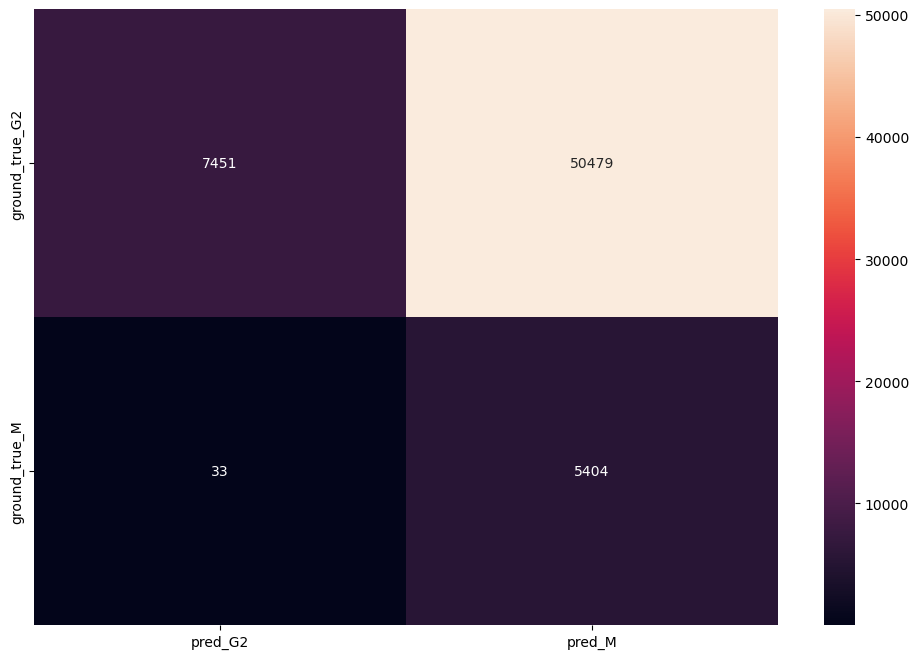

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,FNTA,441.0,368.0,1.905277e+06,1.905277e+06,8031.768872,1457.458945,8031.768872,5177.383029,...,9901.273949,1,3140,4.139883,0.996013,2.725396,2.253449,G2,G2/M,M
1,MM231,ZMAT2,131.0,118.0,1.672473e+06,1.672473e+06,17903.345832,4817.261551,17903.345832,14173.497910,...,17992.416188,1,530,3.187051,1.287249,1.032229,1.077412,G2,G2/M,M
2,U2OS,C1orf131,336.0,324.0,2.573504e+06,2.573504e+06,11962.269885,2524.774419,11962.269885,7942.914755,...,13560.335549,1,1535,4.041615,1.002905,1.766479,1.929945,G2,G2/M,M
3,MM231,QRICH1,547.0,144.0,1.984100e+06,1.984100e+06,19083.376266,4050.312726,19083.376266,13778.472206,...,8311.389027,1,725,3.780886,1.070262,1.412011,1.314808,G2,G2/M,M
4,RPE-1,CDC27,656.0,69.0,1.517814e+06,1.517814e+06,35513.045355,10137.388201,35513.045355,21997.301877,...,14243.031843,1,202,3.297984,1.036560,0.175328,0.422522,M,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,NT,215.0,224.0,1.788330e+06,1.788330e+06,12478.562690,2095.558313,12478.562690,7983.615043,...,11005.028094,1,1334,3.885775,0.992692,1.157859,1.371665,G2,G2/M,M
63363,RPE-1,CDK4,235.0,243.0,1.701506e+06,1.701506e+06,11352.664344,1179.320112,11352.664344,7002.083797,...,8258.887914,1,3188,3.697120,1.017790,2.767058,1.488011,G2,G2/M,G2
63364,MM231,INHBE,189.0,108.0,2.021750e+06,2.021750e+06,26698.570312,7667.773648,26698.570312,18719.909453,...,16303.038617,1,414,3.852632,0.922895,0.806307,0.986106,G2,G2/M,M
63365,MM231,INHBE,19.0,152.0,1.879492e+06,1.879492e+06,17787.898710,3139.386571,17787.898710,12365.080530,...,12945.914023,1,907,3.581546,1.010975,1.766474,1.387853,G2,G2/M,M


In [11]:
data_with_edu = check_pretrained_model(data_p1, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

# 3. 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs

In [11]:
df_all_p2=merge_data(df1=df_ori_221108_P2,df2=df_cellcyle_221108_P2,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p2.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,concentration,label,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046,...,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046
G2/M,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086,...,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086
Polyploid,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353,...,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353
Polyploid (replicating),1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,...,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740
S,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933,...,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933
Sub-G1,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251,...,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251


In [12]:
data_p2=pd.concat([df_all_p2[df_all_p2['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p2

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,MM231,ELOF1,677.0,149.0,1.759988e+06,1.759988e+06,16024.833890,3735.747503,16024.833890,11811.997645,...,11016.308412,16900.836096,1,732.0,3.995210,0.997353,1.393192,1.281405,G2,G2/M
1,RPE-1,IPO9,51.0,340.0,2.091095e+06,2.091095e+06,8716.168244,1748.391124,8716.168244,6150.279551,...,13858.237560,19763.725444,1,2285.0,4.976268,1.094343,1.983290,2.382204,G2,G2/M
2,MM231,NSA2,524.0,187.0,1.938853e+06,1.938853e+06,17917.350478,2535.785594,17917.350478,10368.199430,...,7897.475861,14789.877960,1,1153.0,4.401239,1.017117,2.194468,1.608206,M,G2/M
3,MM231,IPO9,757.0,236.0,1.981396e+06,1.981396e+06,12567.849074,2392.136581,12567.849074,8395.745427,...,7609.898954,11722.394894,1,1240.0,4.497812,0.940469,2.360053,2.029607,G2,G2/M
4,MM231,IPO9,657.0,110.0,1.595058e+06,1.595058e+06,19399.918141,6846.343677,19399.918141,14500.529321,...,11201.417654,17516.406453,1,304.0,3.620817,0.962696,0.578594,0.946003,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,U2OS,GAPD CTL,250.0,310.0,2.098381e+06,2.098381e+06,8822.326016,2357.729406,8822.326016,6768.970631,...,10321.248371,21728.207442,1,1352.0,3.411256,1.097895,1.425531,1.647638,G2,G2/M
25082,MM231,IPO9,802.0,133.0,2.058250e+06,2.058250e+06,21592.491409,9356.871169,21592.491409,15475.565028,...,7873.156128,11107.952941,1,275.0,4.672272,1.086648,0.523399,1.143804,G2,G2/M
25083,MM231,ELOF1,400.0,244.0,2.005388e+06,2.005388e+06,11499.131002,1764.896161,11499.131002,8218.802442,...,7778.040483,9992.316371,1,2059.0,4.552274,1.015738,3.918829,2.098407,G2,G2/M
25084,MM231,IPO9,994.0,152.0,2.153808e+06,2.153808e+06,20811.168401,5054.220106,20811.168401,14169.786793,...,9251.887179,15480.359839,1,554.0,4.889190,1.019479,1.054411,1.307205,G2,G2/M


without Edu

accuracy 0.9072390975045842


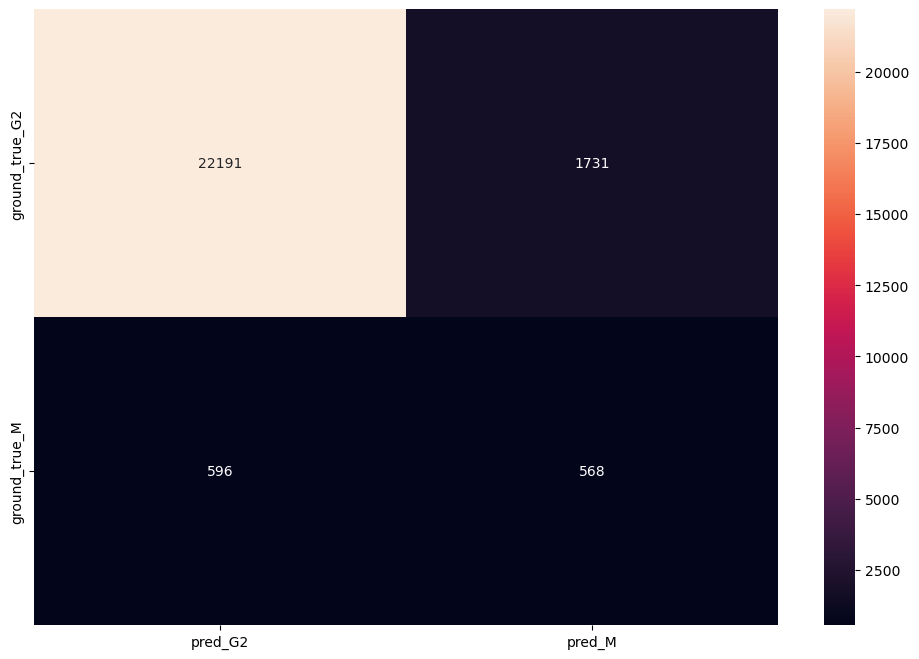

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,MM231,ELOF1,677.0,149.0,1.759988e+06,1.759988e+06,16024.833890,3735.747503,16024.833890,11811.997645,...,16900.836096,1,732.0,3.995210,0.997353,1.393192,1.281405,G2,G2/M,G2
1,RPE-1,IPO9,51.0,340.0,2.091095e+06,2.091095e+06,8716.168244,1748.391124,8716.168244,6150.279551,...,19763.725444,1,2285.0,4.976268,1.094343,1.983290,2.382204,G2,G2/M,G2
2,MM231,NSA2,524.0,187.0,1.938853e+06,1.938853e+06,17917.350478,2535.785594,17917.350478,10368.199430,...,14789.877960,1,1153.0,4.401239,1.017117,2.194468,1.608206,M,G2/M,G2
3,MM231,IPO9,757.0,236.0,1.981396e+06,1.981396e+06,12567.849074,2392.136581,12567.849074,8395.745427,...,11722.394894,1,1240.0,4.497812,0.940469,2.360053,2.029607,G2,G2/M,G2
4,MM231,IPO9,657.0,110.0,1.595058e+06,1.595058e+06,19399.918141,6846.343677,19399.918141,14500.529321,...,17516.406453,1,304.0,3.620817,0.962696,0.578594,0.946003,G2,G2/M,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,U2OS,GAPD CTL,250.0,310.0,2.098381e+06,2.098381e+06,8822.326016,2357.729406,8822.326016,6768.970631,...,21728.207442,1,1352.0,3.411256,1.097895,1.425531,1.647638,G2,G2/M,G2
25082,MM231,IPO9,802.0,133.0,2.058250e+06,2.058250e+06,21592.491409,9356.871169,21592.491409,15475.565028,...,11107.952941,1,275.0,4.672272,1.086648,0.523399,1.143804,G2,G2/M,M
25083,MM231,ELOF1,400.0,244.0,2.005388e+06,2.005388e+06,11499.131002,1764.896161,11499.131002,8218.802442,...,9992.316371,1,2059.0,4.552274,1.015738,3.918829,2.098407,G2,G2/M,G2
25084,MM231,IPO9,994.0,152.0,2.153808e+06,2.153808e+06,20811.168401,5054.220106,20811.168401,14169.786793,...,15480.359839,1,554.0,4.889190,1.019479,1.054411,1.307205,G2,G2/M,G2


In [13]:
data_without_edu = check_pretrained_model(data=data_p2, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

including Edu

accuracy 0.16818145579207527


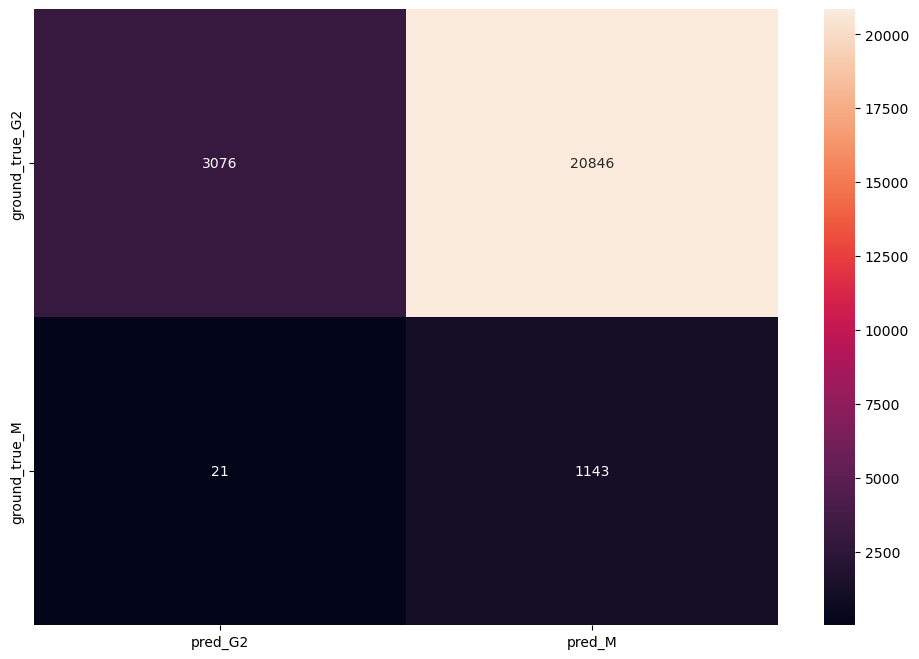

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,RPL37A,16.0,203.0,2.637709e+06,2.637709e+06,23931.806243,6754.340088,23931.806243,12993.642231,...,44801.166891,1,469.0,4.288021,1.149872,0.494507,1.078937,G2,G2/M,M
1,MM231,ELOF1,497.0,135.0,1.579578e+06,1.579578e+06,16202.878235,3577.591756,16202.878235,11700.578400,...,16568.769606,1,581.0,3.585676,1.035386,1.105799,1.161004,G2,G2/M,M
2,U2OS,ISCU,93.0,199.0,1.898285e+06,1.898285e+06,15305.777607,2399.013103,15305.777607,9539.120796,...,12750.714737,1,1198.0,3.085968,0.986132,1.263156,1.057677,G2,G2/M,G2
3,RPE-1,ISCU,177.0,279.0,1.713878e+06,1.713878e+06,8731.349164,1608.047416,8731.349164,6142.930317,...,15574.964196,1,2078.0,4.078588,0.977314,1.803622,1.954808,G2,G2/M,M
4,U2OS,ISCU,277.0,293.0,2.488827e+06,2.488827e+06,12331.034091,2315.603436,12331.034091,8494.288806,...,20968.827582,1,1663.0,4.045988,1.107060,1.753445,1.557283,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,ELOF1,113.0,197.0,1.613236e+06,1.613236e+06,12197.144105,2224.574710,12197.144105,8189.014640,...,16411.124960,1,1102.0,3.662080,1.004149,2.097402,1.694206,G2,G2/M,M
25082,MM231,IPO9,372.0,158.0,2.050788e+06,2.050788e+06,17853.569537,4781.242605,17853.569537,12979.671441,...,10360.815741,1,623.0,4.655333,0.903396,1.185736,1.358805,G2,G2/M,M
25083,U2OS,PRIM1,813.0,243.0,2.961585e+06,2.961585e+06,18369.462786,2868.189468,18369.462786,12187.590910,...,13926.879603,1,1561.0,4.814533,1.031412,1.645898,1.291535,G2,G2/M,M
25084,MM231,NSA2,531.0,113.0,1.519224e+06,1.519224e+06,18107.242468,4401.996618,18107.242468,13444.457259,...,13362.737291,1,459.0,3.448671,1.137798,0.873600,0.971803,G2,G2/M,M


In [15]:
data_with_edu = check_pretrained_model(data_p2, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

In [ ]:
from omero_screen.image_analysis import Image
from cellpose import models
from omero_screen.general_functions import save_fig, generate_image, filter_segmentation, omero_connect, scale_img, \
    color_label
def n_segmentation(image):
    """perform cellpose segmentation using nuclear mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/Nuclei_Hoechst')

    n_channels = [[0, 0]]
    n_mask_array, n_flows, n_styles = model.eval(self.img_dict['DAPI'], channels=n_channels)

        # return cleaned up mask using filter function
    return filter_segmentation(n_mask_array)

def c_segmentation(image_DAPI,image_Tub):
    """perform cellpose segmentation using cell mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/HeLa_Tub_Hoechst')
    c_channels = [[2, 1]]
    # combine the 2 channel numpy array for cell segmentation with the nuclei channel
    comb_image = np.dstack([image_DAPI, image_Tub])
    c_masks_array, c_flows, c_styles = model.eval(comb_image, channels=c_channels)
    # return cleaned up mask using filter function
    return filter_segmentation(c_masks_array)

In [145]:
import skimage
check_8_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check8.tif')
check_tub8=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub8.tif')
check_10_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check10.tif')
check_tub10=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub10.tif')

In [146]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd

def same_img(image1,image2):
    props_1 = pd.DataFrame(regionprops_table(image1, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))
    props_2 = pd.DataFrame(regionprops_table(image2, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))

    if props_1.equals(props_2):
        print('the input two image are same')
    else:
        print('the two input image are different')
    return (props_1,props_2)

In [147]:

# props_1,props_2=same_img(check_7_DAPI,check_8_DAPI)
props_1,props_2=same_img(check_tub8,check_tub10)

the input two image are same
